## Casualidade de Granger 

O teste de causalidade de Granger é usado para determinar se uma série temporal é ou não útil para prever outra. O termo "causa de Granger" significa que o valor da série temporal x em uma certa defasagem é útil para prever o valor da série temporal y em um período de tempo posterior.

### Etapa 1: Carregando os dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [60]:
url = "https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"
df = pd.read_csv(url, sep="  ")

<ipython-input-60-88b221450f8d>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(url, sep="  ")


In [61]:
df.head()

,year,chicken,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


### Visualizando as séries

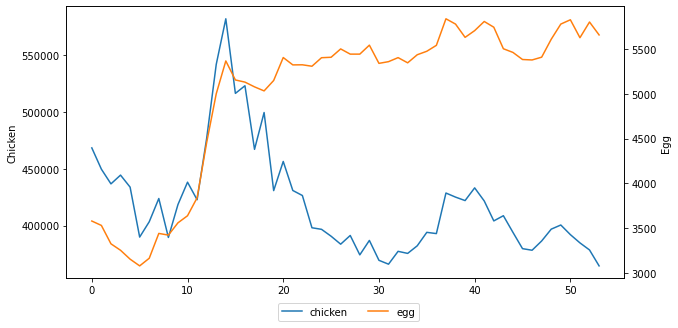

In [62]:
ax = df[['chicken', 'egg']].plot(secondary_y=['egg'], figsize=(10,5));
ax.set_ylabel('Chicken')
ax.right_ax.set_ylabel('Egg')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
handles = h1+h2
labels = l1+l2
ax.legend(handles, labels, loc='lower left', ncol=3, bbox_to_anchor=(0.37, -.175));

### Etapa 2: Executando o teste de Granger

In [63]:
from statsmodels.tsa.stattools import grangercausalitytests

Temos duas colunas no dataframe, certifique-se de colocar a primeira coluna como a série temporal que você acha que está sendo causada pela segunda. Observe que maxlag indica o número de atrasos (lags) a serem usados na primeira série temporal.

In [64]:
grangercausalitytests(df[['chicken', 'egg']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2071  , p=0.2772  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=1.2795  , p=0.2580  , df=1
likelihood ratio test: chi2=1.2643  , p=0.2608  , df=1
parameter F test:         F=1.2071  , p=0.2772  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8175  , p=0.0006  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=19.5110 , p=0.0001  , df=2
likelihood ratio test: chi2=16.5676 , p=0.0003  , df=2
parameter F test:         F=8.8175  , p=0.0006  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=18.7946 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0003 , p=0.0011  , df=3
parameter F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3


{1: ({'ssr_ftest': (1.2071001073095353, 0.2771696182326321, 50.0, 1),
   'ssr_chi2test': (1.2795261137481073, 0.25798716500988217, 1),
   'lrtest': (1.2643251216145472, 0.26083398909735267, 1),
   'params_ftest': (1.2071001073095151, 0.27716961823263536, 50.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.817472803317798, 0.0005601651050435379, 47.0, 2),
   'ssr_chi2test': (19.511003649894704, 5.7974817371809685e-05, 2),
   'lrtest': (16.567596056902858, 0.0002525760848622297, 2),
   'params_ftest': (8.817472803316331, 0.0005601651050441328, 47.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.404984372335093, 0.00296639744557621, 44.0, 3),
   'ssr_chi2test': (18.79460474925612, 0.0003014773550056774, 3),
   'lrtest': (16.000284988230078, 0.0011338317398183065, 3),
   'params_ftest': (5.404984372328396, 0.0029663974455968324, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        

A estatística do teste F é 5,405 e o valor p correspondente é 0,0030.

Como o valor de p é menor que 0,05, **podemos rejeitar a hipótese nula** do teste e concluir que conhecer o número de ovos é útil para prever o número futuro de galinhas.

---

É possível que o número de galinhas esteja fazendo com que o número de ovos mude? 

In [65]:
grangercausalitytests(df[['egg', 'chicken']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=2.0572  , p=0.5606  , df=3
likelihood ratio test: chi2=2.0168  , p=0.5689  , df=3
parameter F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (0.5916153294547113, 0.6237862003923926, 44.0, 3),
   'ssr_chi2test': (2.057207850149337, 0.5606182956436818, 3),
   'lrtest': (2.0167996971329103, 0.568927196697715, 3),
   'params_ftest': (0.5916153294547679, 0.6237862003923565, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

A estatística do teste F é 0.5916 e o valor p correspondente é 0.6238.

Como o valor-p não é menor que 0.05, **não podemos rejeitar a hipótese nula**. Ou seja, o número de galinhas não é preditivo do número futuro de ovos.

---

Assim, podemos apenas concluir que conhecer o número de ovos é útil para prever o número futuro de galinhas.

---

### Preços


In [66]:
import yfinance as yf

In [67]:
df = yf.download(["PETR4.SA", "^BVSP", "^GSPC", "^IXIC", "BTC-USD"], start='2010-01-01')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [68]:
#df.ffill(inplace=True)
df.dropna(inplace=True)

**PETR4 é útil para prever o Ibov?**

Não rejeitamos a H0, pois p-value é maior que 0.05. Portanto, PETR não é útil para prever o IBOV com até 3 lags.

In [69]:
grangercausalitytests(df[["^BVSP", "PETR4.SA"]], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3211  , p=0.2505  , df_denom=1890, df_num=1
ssr based chi2 test:   chi2=1.3232  , p=0.2500  , df=1
likelihood ratio test: chi2=1.3227  , p=0.2501  , df=1
parameter F test:         F=1.3211  , p=0.2505  , df_denom=1890, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6538  , p=0.1916  , df_denom=1887, df_num=2
ssr based chi2 test:   chi2=3.3164  , p=0.1905  , df=2
likelihood ratio test: chi2=3.3135  , p=0.1908  , df=2
parameter F test:         F=1.6538  , p=0.1916  , df_denom=1887, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6702  , p=0.1714  , df_denom=1884, df_num=3
ssr based chi2 test:   chi2=5.0292  , p=0.1697  , df=3
likelihood ratio test: chi2=5.0225  , p=0.1702  , df=3
parameter F test:         F=1.6702  , p=0.1714  , df_denom=1884, df_num=3


**SPX é útil para prever o Ibov?**

Rejeitamos a H0, pois p-value é menor que 0.05. Portanto, SPX é útil para prever o IBOV

In [70]:
grangercausalitytests(df[["^BVSP", "^GSPC"]], maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0372  , p=0.8470  , df_denom=1890, df_num=1
ssr based chi2 test:   chi2=0.0373  , p=0.8469  , df=1
likelihood ratio test: chi2=0.0373  , p=0.8469  , df=1
parameter F test:         F=0.0372  , p=0.8470  , df_denom=1890, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1479  , p=0.3175  , df_denom=1887, df_num=2
ssr based chi2 test:   chi2=2.3018  , p=0.3163  , df=2
likelihood ratio test: chi2=2.3004  , p=0.3166  , df=2
parameter F test:         F=1.1479  , p=0.3175  , df_denom=1887, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1806  , p=0.3157  , df_denom=1884, df_num=3
ssr based chi2 test:   chi2=3.5549  , p=0.3137  , df=3
likelihood ratio test: chi2=3.5515  , p=0.3141  , df=3
parameter F test:         F=1.1806  , p=0.3157  , df_denom=1884, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1307  , p=0.

**Nasdaq é útil para prever o Bitcoin?**

Rejeitamos a H0, pois p-value não é menor que 0.05. Portanto, Nasdaq é útil para prever o Bitcoin

In [71]:
grangercausalitytests(df[["BTC-USD", "^IXIC"]], maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2983 , p=0.0014  , df_denom=1890, df_num=1
ssr based chi2 test:   chi2=10.3147 , p=0.0013  , df=1
likelihood ratio test: chi2=10.2867 , p=0.0013  , df=1
parameter F test:         F=10.2983 , p=0.0014  , df_denom=1890, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0395  , p=0.0066  , df_denom=1887, df_num=2
ssr based chi2 test:   chi2=10.1057 , p=0.0064  , df=2
likelihood ratio test: chi2=10.0788 , p=0.0065  , df=2
parameter F test:         F=5.0395  , p=0.0066  , df_denom=1887, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6829  , p=0.0116  , df_denom=1884, df_num=3
ssr based chi2 test:   chi2=11.0896 , p=0.0113  , df=3
likelihood ratio test: chi2=11.0572 , p=0.0114  , df=3
parameter F test:         F=3.6829  , p=0.0116  , df_denom=1884, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.6931  , p=0.

---

Fonte: https://www.statology.org/granger-causality-test-in-python/#:~:text=The%20Granger%20Causality%20test%20is,is%20useful%20for%20forecasting%20another.&text=The%20term%20%E2%80%9CGranger%2Dcauses%E2%80%9D,at%20a%20later%20time%20period.